<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [15]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [16]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

#### Read the dataset in the csv file from the URL


In [17]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [18]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


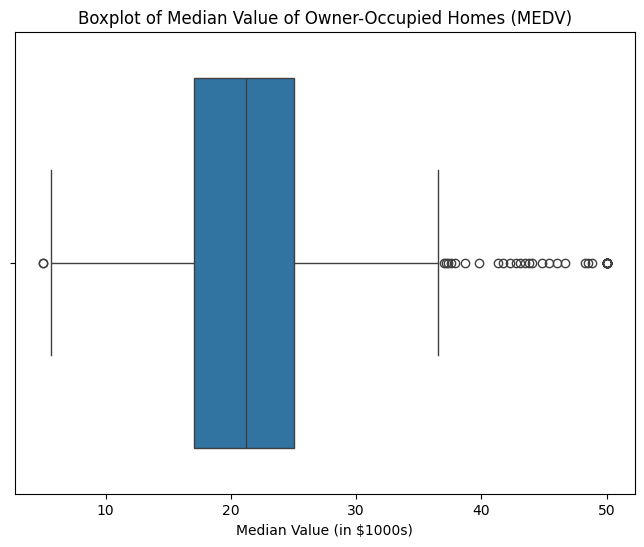

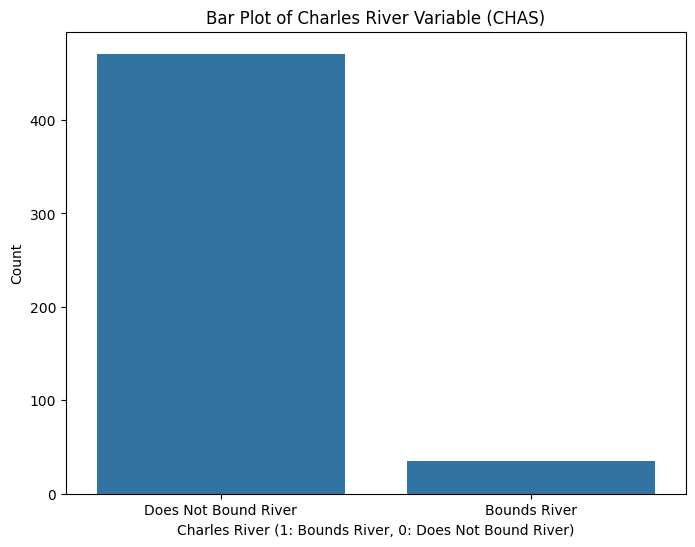

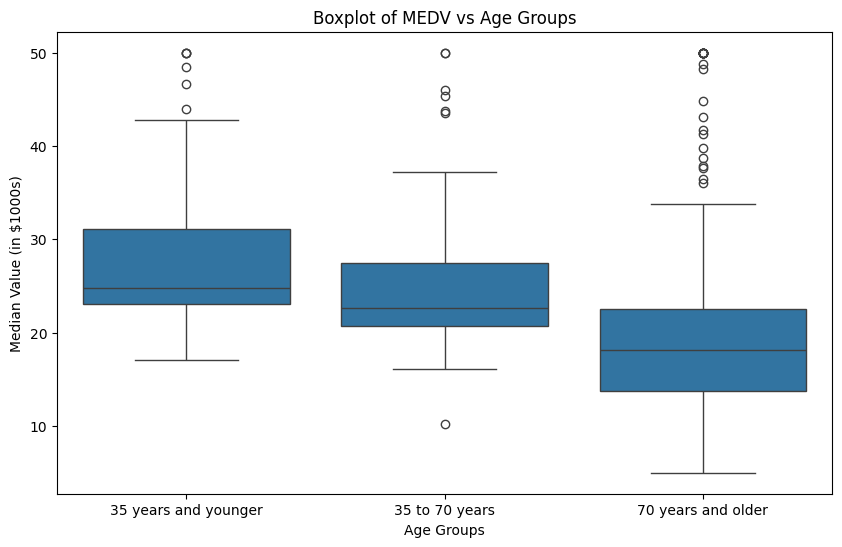

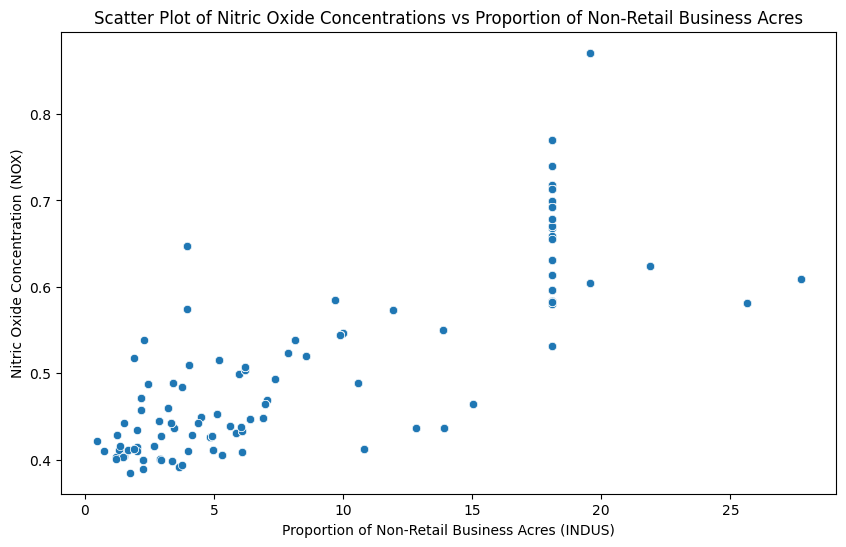

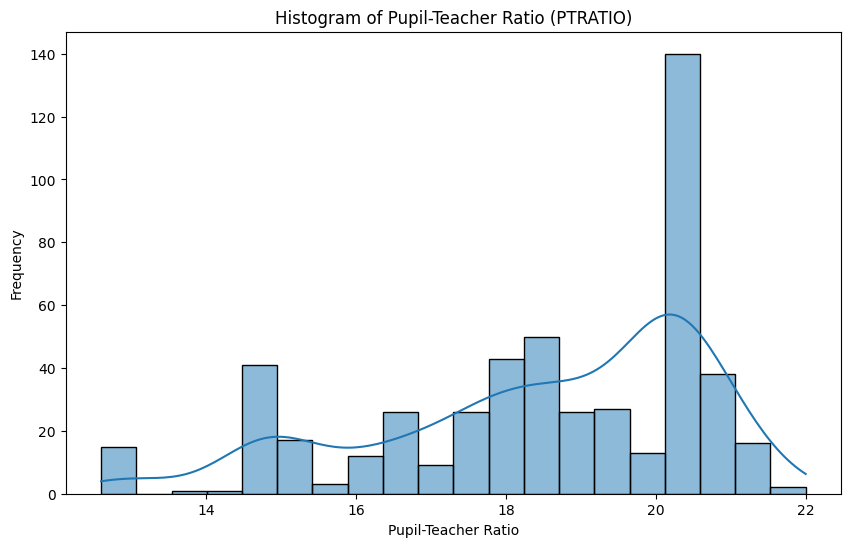

In [19]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value (in $1000s)')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('Charles River (1: Bounds River, 0: Does Not Bound River)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Does Not Bound River', 'Bounds River'])
plt.show()

age_bins = [0, 35, 70, np.inf]  # Age groups
age_labels = ['35 years and younger', '35 to 70 years', '70 years and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Median Value (in $1000s)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [20]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? 
print("Null Hypothesis:  There is no significant difference in the median value of houses between those bounded by the Charles River and those that are not.")
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_value = stats.ttest_ind(medv_chas_0, medv_chas_1)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River or not.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the median value of houses bounded by the Charles River or not.")

#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 
print("\nNull Hypothesis: There is no significant difference in the median values of houses for different age groups of houses.")
anova_result = stats.f_oneway(
    boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '35 to 70 years']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'])

f_stat, p_value = anova_result
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in median values of houses for different age groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in median values of houses for different age groups.")

#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
print("\nNull Hypothesis: There is no relationship between nitric oxide concentrations and the proportion of non-retail business acres.")
corr, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation: {corr:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between NOX and INDUS.")

#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?
print("\nNull Hypothesis: The coefficient for weighted distances (DIS) is equal to 0 (no impact on the median value of homes).")
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

if model.pvalues[1] < 0.05:
    print(f"The coefficient for DIS is significant. The impact of an additional weighted distance (DIS) on the median value (MEDV) is {model.params[1]:.4f}.")
else:
    print("The coefficient for DIS is not significant. There is no evidence of an impact.")

Null Hypothesis:  There is no significant difference in the median value of houses between those bounded by the Charles River and those that are not.
T-statistic: -3.9964, P-value: 0.0001
Reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River or not.

 Null Hypothesis: There is no significant difference in the median values of houses for different age groups of houses.
F-statistic: 36.4076, P-value: 0.0000
Reject the null hypothesis. There is a significant difference in median values of houses for different age groups.

 Null Hypothesis: There is no relationship between nitric oxide concentrations and the proportion of non-retail business acres.
Pearson Correlation: 0.7637, P-value: 0.0000
Reject the null hypothesis. There is a significant relationship between NOX and INDUS.

 Null Hypothesis: The coefficient for weighted distances (DIS) is equal to 0 (no impact on the median value of homes).
                            

<ipython-input-20-4c6d778d429e>:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.pvalues[1] < 0.05:
<ipython-input-20-4c6d778d429e>:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The coefficient for DIS is significant. The impact of an additional weighted distance (DIS) on the median value (MEDV) is {model.params[1]:.4f}.")


The coefficient for DIS is significant. The impact of an additional weighted distance (DIS) on the median value (MEDV) is 1.0916.
